In [1]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 448 kB 37.9 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
# *- encoding : utf-8 -*- 패키지 불러오는 작업 
import json
import ast
import sys
import re   # 정규 표현식 가지고 오는 패키지 
from konlpy.tag import Twitter
from konlpy.tag import Komoran
from konlpy.tag import Kkma

In [37]:
# 파일 가져오는 문 
from google.colab import files
myfile = files.upload()

Saving cheers.txt to cheers.txt


In [39]:
# 대화 파일 열기 강아지 --> 파일 이름명

openFileName = 'cheers.txt'
f = open(openFileName, 'r', encoding='UTF-8') 
data = f.read()
f.close()

In [40]:
data

# 토큰화 : 쪼개는거 
# 태깅 : 명사 , 동사 구분해주는 것  ( 명사,동사 or 명사 형용사)
# 빈도 
# 어린왕자 : 8 , 떡 : 10 , 
# 글씨크기가 달라지고 - > 워드 클라우드 

'영어의 \'Wine\'은 한국어로는 포도주로 번역하나 엄밀히 말해서 완전히 같은 것은 아니다.\n\n넓은 의미의 와인은 포도의 즙으로 만든 알코올성 음료뿐만 아니라 뭇 과실이나 꽃 혹은 약초를 발효시켜서 만든 알코올성 음료를 총칭하는 말이지만, 좁은 의미에서의 와인은 포도의 즙을 발효시켜서 만든 알코올성의 양조주다.\n\n영어 단어인 와인은 단독으로 표기할 때는 포도를 이용한 과실주를 나타내는 것이 일반적이지만, 발효주 중에서도 과일을 발효한 술을 뜻하기도 한다. 즉, 포도주 외에도 다른 과일주를 뜻하기도 하는데, 이때는 해당 작물이나 곡류의 이름을 함께 병기하여 블루베리 와인, 라즈베리 와인, 아이스베리 와인, 체리 와인, 감 와인 등으로 쓴다. 하지만 포도로 만든 술이 너무 유명하고 많다 보니 보통 저 단어를 한국어로 번역할 때에는 과일주보다는 포도주로 번역한다.[5]\n\n이탈리아어와 스페인어로는 비노(vino)로 철자는 같지만, 발음은 약간 다르다.[6]\n\n전 세계에서 매년 생산되는 와인 종류는 셀 수 없이 많다. 최근엔 옐로우 와인(Yellow Wine)이나 앰버 와인(Amber Wine)등 기존 분류에 새로운 와인 종류가 추가되기도 한다.\n\n와인 성분을 들여다보면, 레드 와인은 평균적으로 수분 86%, 에탄올(알코올) 12%, 글리세롤 1%, 유기산 0.4%, 타닌 및 폴리페놀계 화합물 0.1%, 기타 성분 0.5%로 구성된다.\n\n참고로 일괄적으로 포도주로 번역했는데 정작 원문에서는 포도주가 아닌 다른 과일 발효주를 의미하는 경우도 있다. 자세한 내용은 과일주 항목 참조.\n2. 역사[편집]\n2.1. 고대[편집]\n술 중에서도 과일주(과실주)라고 하면 제일 먼저 떠오르는 양조주의 일종[7]으로 고대 메소포타미아 시대부터 와인을 식사에 곁들이거나 요리에 사용했으며, 이는 현재 서양 음식 문화의 기본이 되었다. 다만 포도라는 과실 자체가 당과 효모를 동시에 가지고 있어서 자연발효를 통해 와인이 되기에 어디서 누가 처음 만들어 먹었는지 추정

In [41]:
from konlpy.tag import Okt
okt = Okt()
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [42]:
# tokenizer --> 쪼갤거에요!! (word 토큰화)
# pos tagging 다양하게 --> okt, kkma, mecab 다양하게 있었어요
# --> okt 트위터 할꺼에요

# pos tagging --> pos(품사), tagging(붙여주는)
# stop word -->

ff = open('wine_추출.txt','w')

from konlpy.tag import Okt
okt = Okt()
documents1 = []

# 로봇은 공부할 땐 어렵습니다.
# 로봇 은 공부 할 땐 어렵 습니다.
# 어렵다(Adjective)
def tokenizer(raw, pos=["Noun", "Adjective"], 
              stopword=["오전", "오후", "사진", "이모티콘", "님", "가족"]):
    return [
        word for word, tag in okt.pos(
            raw, 
            norm=True,   # normalize : 그랰ㅋㅋ --> 그래ㅋㅋ
            stem=True    # stemming : 바뀌나 -->바뀌다
            )
            if len(word) > 1 and tag in pos and word not in stopword
        ]

documents1 = tokenizer(data)
print(documents1)    

for b in range(0, len(documents1)):
    fb = documents1[b]
    ff.write('%s\n' %fb)

ff.close()

['영어', '한국어', '포도주', '번역', '하나', '엄밀하다', '완전하다', '같다', '아니다', '넓다', '의미', '와인', '포도', '알코올', '음료', '아니다', '과실', '약초', '발효', '알코올', '음료', '총칭', '좁다', '의미', '와인', '포도', '발효', '알코올', '성의', '양조주', '영어', '단어', '와인', '단독', '표기', '포도', '이용', '과실주', '일반', '발효', '과일', '발효', '포도주', '다른', '과일', '해당', '작물', '곡류', '이름', '병기', '블루베리', '와인', '라즈베리', '와인', '아이스', '베리', '와인', '체리', '와인', '와인', '포도', '유명하다', '많다', '보통', '단어', '한국어', '역할', '과일', '포도주', '번역', '이탈리아어', '스페인어', '비노', '철자', '같다', '발음', '약간', '다르다', '세계', '매년', '생산', '와인', '종류', '많다', '최근', '옐로우', '와인', '이나', '앰버', '와인', '기존', '분류', '새롭다', '와인', '종류', '기도', '와인', '성분', '레드', '와인', '평균', '수분', '에탄올', '알코올', '글리세롤', '유기산', '타닌', '폴리페놀', '화합물', '기타', '성분', '구성', '참고', '일괄', '포도주', '번역', '정작', '원문', '포도주', '아니다', '다른', '과일', '발효', '의미', '경우', '있다', '자세하다', '내용', '과일', '항목', '참조', '역사', '편집', '고대', '편집', '과일', '과실주', '제일', '먼저', '양조주', '일종', '고대', '메소포타미아', '시대', '와인', '식사', '요리', '사용', '현재', '서양', '음식', '문화', '기본', '다만', '포도', '과실', '자체', '효모', '

In [43]:
import csv, sys
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [45]:
openFileName = 'wine_추출.txt'
    
f = open(openFileName, 'r')
data = f.read()
f.close()

In [46]:
data = [data]
vectorize = CountVectorizer()
X = vectorize.fit_transform(data)

In [47]:
data

['영어\n한국어\n포도주\n번역\n하나\n엄밀하다\n완전하다\n같다\n아니다\n넓다\n의미\n와인\n포도\n알코올\n음료\n아니다\n과실\n약초\n발효\n알코올\n음료\n총칭\n좁다\n의미\n와인\n포도\n발효\n알코올\n성의\n양조주\n영어\n단어\n와인\n단독\n표기\n포도\n이용\n과실주\n일반\n발효\n과일\n발효\n포도주\n다른\n과일\n해당\n작물\n곡류\n이름\n병기\n블루베리\n와인\n라즈베리\n와인\n아이스\n베리\n와인\n체리\n와인\n와인\n포도\n유명하다\n많다\n보통\n단어\n한국어\n역할\n과일\n포도주\n번역\n이탈리아어\n스페인어\n비노\n철자\n같다\n발음\n약간\n다르다\n세계\n매년\n생산\n와인\n종류\n많다\n최근\n옐로우\n와인\n이나\n앰버\n와인\n기존\n분류\n새롭다\n와인\n종류\n기도\n와인\n성분\n레드\n와인\n평균\n수분\n에탄올\n알코올\n글리세롤\n유기산\n타닌\n폴리페놀\n화합물\n기타\n성분\n구성\n참고\n일괄\n포도주\n번역\n정작\n원문\n포도주\n아니다\n다른\n과일\n발효\n의미\n경우\n있다\n자세하다\n내용\n과일\n항목\n참조\n역사\n편집\n고대\n편집\n과일\n과실주\n제일\n먼저\n양조주\n일종\n고대\n메소포타미아\n시대\n와인\n식사\n요리\n사용\n현재\n서양\n음식\n문화\n기본\n다만\n포도\n과실\n자체\n효모\n동시\n가지\n있다\n자연\n발효\n통해\n와인\n누가\n처음\n추정\n많다\n난제\n아프리카\n원숭이\n코끼리\n물이\n웅덩이\n나무\n구멍\n나무\n열매\n자연\n발효\n자연\n과실주\n용하다\n사례\n목격\n있다\n동물\n이렇다\n사람\n필요\n있다\n지구\n인류\n처음\n전이\n추정\n포도\n인류\n탄생\n전인\n있다\n때문\n포도주\n역사\n인류\n역사\n있다\n기원전\n무렵\n조지아\n아르메니아\n터키\n북부\n지역\n코카서스\n지방\n출토\n포도\n씨앗\n타르타르산\n보고\n최초\n포도\n재배\n추정\n기원전\n포도\n항아리\n와인\n기구\n발견\

In [48]:
print(vectorize.vocabulary_)

{'영어': 530, '한국어': 841, '포도주': 812, '번역': 300, '하나': 834, '엄밀하다': 510, '완전하다': 549, '같다': 18, '아니다': 478, '넓다': 135, '의미': 594, '와인': 547, '포도': 810, '알코올': 491, '음료': 590, '과실': 58, '약초': 498, '발효': 290, '총칭': 758, '좁다': 707, '성의': 403, '양조주': 502, '단어': 160, '단독': 159, '표기': 821, '이용': 610, '과실주': 59, '일반': 631, '과일': 61, '다른': 151, '해당': 853, '작물': 654, '곡류': 50, '이름': 603, '병기': 306, '블루베리': 336, '라즈베리': 209, '아이스': 485, '베리': 302, '체리': 756, '유명하다': 581, '많다': 233, '보통': 313, '역할': 524, '이탈리아어': 617, '스페인어': 444, '비노': 338, '철자': 753, '발음': 287, '약간': 497, '다르다': 150, '세계': 409, '매년': 238, '생산': 378, '종류': 709, '최근': 759, '옐로우': 538, '이나': 599, '앰버': 494, '기존': 114, '분류': 332, '새롭다': 376, '기도': 103, '성분': 401, '레드': 213, '평균': 807, '수분': 429, '에탄올': 514, '글리세롤': 96, '유기산': 574, '타닌': 789, '폴리페놀': 820, '화합물': 873, '기타': 115, '구성': 73, '참고': 748, '일괄': 627, '정작': 683, '원문': 563, '경우': 36, '있다': 646, '자세하다': 649, '내용': 131, '항목': 849, '참조': 749, '역사': 522, '편집': 805, '고대': 46, '제일': 

In [49]:
print(X.toarray())

[[ 4  1  1  1  1  9  5  3  1  1  1  1  1  1  1  1  1  1  4  1  1  1  1  1
   1  1  1  2  3  1  1  1  3  4  2  1 16  2  1  1  2  1  1  1  1  4  9  1
   1  1  1  3  1  2  1  1  1  1  2  4  1  9  5  2 10  3  2  1  1  1  1  1
   1  1  1  4  1  1  1  3  3  1  1  3  1  2  4  1  6  1  1  1  1  1  1  3
   1  1  1  2  1  1  1  6  1 12  2  1  1  1  1  1  5  1  2  1  1  1  1  1
   1  2  2  1  1  2  1  2  1  1  1  1  1  1  4  1  1  2  1  1  1  1  1  1
   3  3  1  2  1  1  1  6  3  3  1  1  1  1  1  1  4  1  4  1  4  1  1  1
   1  1  1  2  1  3  1  1  1  2 10  4  1  1  2  1  1  1  1  1  1  3  1  1
   1  1  1  1  2  1  1  1  1  1  2  2  1 10  6  1  1  1  1  3  1  1  9  2
   1  2  1  1  1  1  1  1  1  1  3  1  1  1  1  3  1 10  1  1  1  1  2  4
   1  1 11  1  2  1  1  1  1  1  1  1  1  1  1  2  1  2  2  1  1  1  1  1
   1  2  6  5  1  1  4  1  3  2  1  1  1  1  1  1  1  2  1  1 10  1  2  1
   5  1 14  1  3  1  1  1  1  1  2  1  4  1  1  1  1  1  1  2  4  1  2  2
   3  3  1  1  1  1  1  1  1  1  1  1 

In [50]:
tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)
print(tfidf.fit_transform(vectorize.fit_transform(data)).toarray())

[[0.02904964 0.00726241 0.00726241 0.00726241 0.00726241 0.0653617
  0.03631206 0.02178723 0.00726241 0.00726241 0.00726241 0.00726241
  0.00726241 0.00726241 0.00726241 0.00726241 0.00726241 0.00726241
  0.02904964 0.00726241 0.00726241 0.00726241 0.00726241 0.00726241
  0.00726241 0.00726241 0.00726241 0.01452482 0.02178723 0.00726241
  0.00726241 0.00726241 0.02178723 0.02904964 0.01452482 0.00726241
  0.11619858 0.01452482 0.00726241 0.00726241 0.01452482 0.00726241
  0.00726241 0.00726241 0.00726241 0.02904964 0.0653617  0.00726241
  0.00726241 0.00726241 0.00726241 0.02178723 0.00726241 0.01452482
  0.00726241 0.00726241 0.00726241 0.00726241 0.01452482 0.02904964
  0.00726241 0.0653617  0.03631206 0.01452482 0.07262411 0.02178723
  0.01452482 0.00726241 0.00726241 0.00726241 0.00726241 0.00726241
  0.00726241 0.00726241 0.00726241 0.02904964 0.00726241 0.00726241
  0.00726241 0.02178723 0.02178723 0.00726241 0.00726241 0.02178723
  0.00726241 0.01452482 0.02904964 0.00726241 0.0

In [51]:
freqs = [(word, X.getcol(idx).sum()) for word, idx in \
         vectorize.vocabulary_.items()]
dict(freqs)

{'가격': 4,
 '가깝다': 1,
 '가능성': 1,
 '가능하다': 1,
 '가세': 1,
 '가장': 9,
 '가지': 5,
 '가치': 3,
 '가품': 1,
 '각광': 1,
 '각종': 1,
 '간주': 1,
 '갈증': 1,
 '갈피': 1,
 '감탄': 1,
 '갑부': 1,
 '강물': 1,
 '강하다': 1,
 '같다': 4,
 '개념': 1,
 '개량': 1,
 '개선': 1,
 '개항': 1,
 '갸웃거릴': 1,
 '거나': 1,
 '거듭': 1,
 '거리': 1,
 '거의': 2,
 '거품': 3,
 '걸쭉하다': 1,
 '것이므': 1,
 '게다가': 1,
 '결정': 3,
 '경기': 4,
 '경로': 2,
 '경색': 1,
 '경우': 16,
 '경쟁': 2,
 '경쟁력': 1,
 '경제': 1,
 '경험': 2,
 '계급': 1,
 '계기': 1,
 '계량': 1,
 '계속': 1,
 '고급': 4,
 '고대': 9,
 '고려': 1,
 '고민': 1,
 '고스': 1,
 '곡류': 1,
 '곡물': 3,
 '곡식': 1,
 '곡주': 2,
 '곰팡이': 1,
 '공식': 1,
 '과거': 1,
 '과시': 1,
 '과실': 2,
 '과실주': 4,
 '과언': 1,
 '과일': 9,
 '과정': 5,
 '과학': 2,
 '관련': 10,
 '관리': 3,
 '관세': 2,
 '관심사': 1,
 '교란': 1,
 '교육세': 1,
 '교통': 1,
 '구가': 1,
 '구멍': 1,
 '구성': 1,
 '국내': 1,
 '국제': 4,
 '국제화': 1,
 '군인': 1,
 '권장': 1,
 '귀족': 3,
 '귀하다': 3,
 '규제': 1,
 '그간': 1,
 '그냥': 3,
 '그다지': 1,
 '그대로': 2,
 '그렇다': 4,
 '그릇': 1,
 '그리스': 6,
 '그리스도': 1,
 '그리스도교': 1,
 '그리스신화': 1,
 '그리스인': 1,
 '극소': 1,
 '극찬': 1,
 '근대': 3,
 '글리세롤

In [52]:
from google.colab import files
myfile = files.upload()

Saving BMDOHYEON_ttf.ttf to BMDOHYEON_ttf (1).ttf


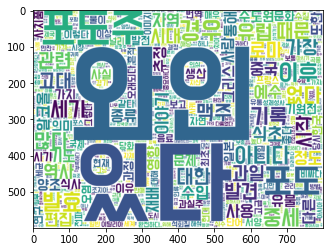

In [53]:
from wordcloud import WordCloud

w = WordCloud(font_path='BMDOHYEON_ttf.ttf', width=800, height=600, 
              mode='RGBA', background_color='white', 
              max_words=2000).fit_words(dict(freqs))

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(w)

# plt.axis(&quot;off&quot;)
plt.show()

In [54]:
vectorizeT = TfidfVectorizer()

Y = vectorizeT.fit_transform(data)

print(vectorize.vocabulary_) 
print(Y.toarray()) 

{'영어': 530, '한국어': 841, '포도주': 812, '번역': 300, '하나': 834, '엄밀하다': 510, '완전하다': 549, '같다': 18, '아니다': 478, '넓다': 135, '의미': 594, '와인': 547, '포도': 810, '알코올': 491, '음료': 590, '과실': 58, '약초': 498, '발효': 290, '총칭': 758, '좁다': 707, '성의': 403, '양조주': 502, '단어': 160, '단독': 159, '표기': 821, '이용': 610, '과실주': 59, '일반': 631, '과일': 61, '다른': 151, '해당': 853, '작물': 654, '곡류': 50, '이름': 603, '병기': 306, '블루베리': 336, '라즈베리': 209, '아이스': 485, '베리': 302, '체리': 756, '유명하다': 581, '많다': 233, '보통': 313, '역할': 524, '이탈리아어': 617, '스페인어': 444, '비노': 338, '철자': 753, '발음': 287, '약간': 497, '다르다': 150, '세계': 409, '매년': 238, '생산': 378, '종류': 709, '최근': 759, '옐로우': 538, '이나': 599, '앰버': 494, '기존': 114, '분류': 332, '새롭다': 376, '기도': 103, '성분': 401, '레드': 213, '평균': 807, '수분': 429, '에탄올': 514, '글리세롤': 96, '유기산': 574, '타닌': 789, '폴리페놀': 820, '화합물': 873, '기타': 115, '구성': 73, '참고': 748, '일괄': 627, '정작': 683, '원문': 563, '경우': 36, '있다': 646, '자세하다': 649, '내용': 131, '항목': 849, '참조': 749, '역사': 522, '편집': 805, '고대': 46, '제일': 

In [55]:
freqs_TFIDF = [(word, Y.getcol(idx).sum()) for word, 
               idx in vectorizeT.vocabulary_.items()]
dict(freqs_TFIDF)

{'가격': 0.029049644688706338,
 '가깝다': 0.0072624111721765845,
 '가능성': 0.0072624111721765845,
 '가능하다': 0.0072624111721765845,
 '가세': 0.0072624111721765845,
 '가장': 0.06536170054958926,
 '가지': 0.03631205586088292,
 '가치': 0.021787233516529753,
 '가품': 0.0072624111721765845,
 '각광': 0.0072624111721765845,
 '각종': 0.0072624111721765845,
 '간주': 0.0072624111721765845,
 '갈증': 0.0072624111721765845,
 '갈피': 0.0072624111721765845,
 '감탄': 0.0072624111721765845,
 '갑부': 0.0072624111721765845,
 '강물': 0.0072624111721765845,
 '강하다': 0.0072624111721765845,
 '같다': 0.029049644688706338,
 '개념': 0.0072624111721765845,
 '개량': 0.0072624111721765845,
 '개선': 0.0072624111721765845,
 '개항': 0.0072624111721765845,
 '갸웃거릴': 0.0072624111721765845,
 '거나': 0.0072624111721765845,
 '거듭': 0.0072624111721765845,
 '거리': 0.0072624111721765845,
 '거의': 0.014524822344353169,
 '거품': 0.021787233516529753,
 '걸쭉하다': 0.0072624111721765845,
 '것이므': 0.0072624111721765845,
 '게다가': 0.0072624111721765845,
 '결정': 0.021787233516529753,
 '경기': 0.

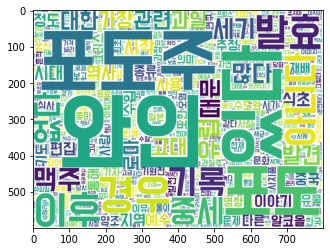

In [56]:
w1 = WordCloud(font_path='BMDOHYEON_ttf.ttf', width=800, height=600, 
               mode='RGBA', background_color='white', 
               max_words=2000).fit_words(dict(freqs_TFIDF))

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(w1)
plt.show()

In [64]:
from google.colab import files
myfile = files.upload()

Saving wineglass.jpg to wineglass.jpg


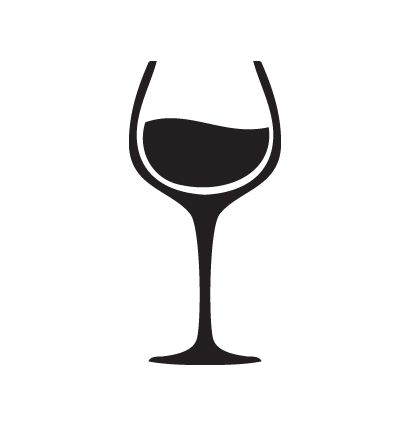

In [65]:
from collections import Counter  # Count the frequency of distinct strings
from wordcloud import WordCloud, ImageColorGenerator  # Generate wordclouds
from PIL import Image  # Load images from files
import numpy as np  # Convert images to numbers

image = Image.open("wineglass.jpg")  # Load the image from a file

image  # Display the image

In [66]:
mask = np.array(image)  # Convert the image to a numeric representation (a 3D array)
mask[0][0]  # Display the top left pixel of the mask, which is white

array([255, 255, 255], dtype=uint8)

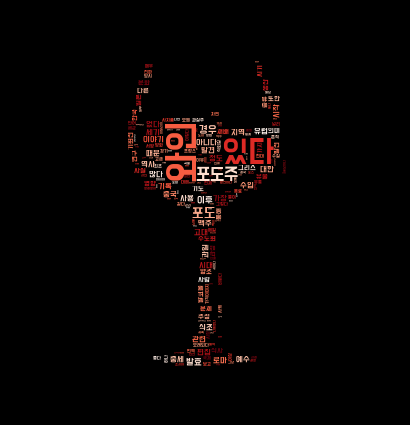

In [67]:
# Create a wordcloud generator with a mask

fog_machine = WordCloud(font_path = 'BMDOHYEON_ttf.ttf',
                        mask=mask,
                        min_font_size=2,
                        colormap="Reds")  

# Generate the cloud using a frequency dictionary

fog_machine.fit_words(dict(freqs_TFIDF))

fog_machine.to_image()  # Display the cloud

In [68]:
from konlpy.tag import Okt  
okt = Okt()  # twitter
print(okt.morphs("나는 오늘도 공부를 하고 있네요?"))

['나', '는', '오늘', '도', '공부', '를', '하고', '있네요', '?']


In [69]:
print(okt.pos("나는 인공지능 수업을 듣고있고, 9시에는 수업이 끝날껄? 아마"))  

[('나', 'Noun'), ('는', 'Josa'), ('인공', 'Noun'), ('지능', 'Noun'), ('수업', 'Noun'), ('을', 'Josa'), ('듣고있고', 'Verb'), (',', 'Punctuation'), ('9시', 'Number'), ('에는', 'Foreign'), ('수업', 'Noun'), ('이', 'Josa'), ('끝날껄', 'Noun'), ('?', 'Punctuation'), ('아마', 'Noun')]


In [70]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [71]:
text = " 안녕하세요 오늘은 날씨가 좋네요ㅇㅁㅇㅁㅋㅋㅋㅋㅋ"

In [72]:
okt.morphs(text)

['안녕하세요', '오늘', '은', '날씨', '가', '좋네요', 'ㅇㅁㅇㅁㅋㅋㅋㅋㅋ']

In [74]:
okt.morphs(text, stem=True)

['안녕하다', '오늘', '은', '날씨', '가', '좋다', 'ㅇㅁㅇㅁㅋㅋㅋㅋㅋ']

In [75]:
okt.morphs(text, norm=True)

['안녕하세요', '오늘', '은', '날씨', '가', '좋네요', 'ㅇㅁㅇㅁㅋㅋㅋ']